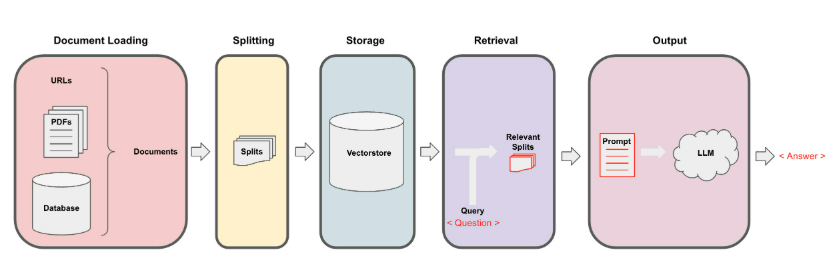

In [21]:
from IPython.display import Image
Image("RAG Architecture.png")


## Ebeddings & Retrieval 

In [1]:
from langchain_community.document_loaders import PyPDFLoader
loaders = [
    # Duplicate documents on purpose - messy data
    PyPDFLoader("Pdfs\MachineLearning-Lecture01.pdf"),
    PyPDFLoader("Pdfs\MachineLearning-Lecture02.pdf"),
    PyPDFLoader("Pdfs\MachineLearning-Lecture03.pdf")
]
docs = []
for loader in loaders:
    docs.extend(loader.load())


In [2]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)
splits = text_splitter.split_documents(docs)

In [3]:
from langchain.vectorstores import FAISS
from langchain.embeddings import OllamaEmbeddings
from langchain.chains import RetrievalQA
from langchain_ollama import OllamaLLM#, OllamaEmbeddings


llm = OllamaLLM(model="llama3")  

In [4]:
from langchain_huggingface import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [5]:
vectorstore = FAISS.from_documents(splits, embedding)

In [7]:
q1 = "What is Andrew Ng’s definition of machine learning?"

In [8]:
vectorstore.max_marginal_relevance_search(q1,k=2, fetch_k=3)

[Document(id='ffe4a45e-62ce-42d7-a338-2859ea2e15fc', metadata={'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'creator': 'PScript5.dll Version 5.2.2', 'creationdate': '2008-07-11T11:25:23-07:00', 'author': '', 'moddate': '2008-07-11T11:25:23-07:00', 'title': '', 'source': 'Pdfs\\MachineLearning-Lecture01.pdf', 'total_pages': 22, 'page': 10, 'page_label': '11'}, page_content='very excited about the new projector in this room, but I guess we\'ll see that in operation \non Wednesday.  \nSo start by talking about what machine learning is. What is machine learning? Actually, \ncan you read the text out there? Raise your hand if the text on the small screens is legible. \nOh, okay, cool, mostly legible. Okay. So I\'ll just read it out.  \nSo what is machine learning? Way back in about 1959, Arthur Samuel defined machine \nlearning informally as the [inaudible] that gives computers to learn — [inaudible] that \ngives computers the ability to learn without being explicitly programmed. So Art

### Compression Retriever

In [9]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

In [10]:
def pretty_print_docs(docs):
    print(f"\n{'-' * 100}\n".join([f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]))


In [11]:
# Wrap our vectorstore
compressor = LLMChainExtractor.from_llm(llm)

In [12]:
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vectorstore.as_retriever(search_type = "mmr")
)

In [ ]:
question = "What are major topics for this class?"
compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

Document 1:

Extracted relevant parts:

statistics
algebra
machine learning
----------------------------------------------------------------------------------------------------
Document 2:

Here are the extracted relevant parts:

* For homework, one midterm, one open and term project.
* Notice on the honor code.
* One thing that I think will help you to succeed and do well in this class is if you form a study group.
* Start looking around where you're sitting now or at the end of class today, mingle a little bit and get to know your classmates.
* Strongly encourage you to form study groups and sort of have a group of people to study with and have a group of your fellow students to talk over these concepts with.
----------------------------------------------------------------------------------------------------
Document 3:

Extracted relevant parts:

principles. So I assume all of you know what big?O notation, that all of you know about 
sort of data structures like queues, stacks, bina

In [13]:
question = "what did they say about matlab?"
compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

C:\Users\Youssef_Mahmoud\AppData\Local\Temp\ipykernel_15792\660739846.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  compressed_docs = compression_retriever.get_relevant_documents(question)


Document 1:

Here are the extracted relevant parts:

MATLAB is part of the programming language that makes it very easy to write codes using matrices, to write code for numerical routines, to move data around, to plot data. And it's sort of an extremely easy to learn tool to use for implementing a lot of learning algorithms.

MATLAB is I guess part of the programming language that makes it very easy to write codes using matrices, to write code for numerical routines, to move data around, to plot data.

And in case some of you want to work on your own home computer or something if you don't have a MATLAB license, for the purposes of this class, there's also — [inaudible] write that down [inaudible] MATLAB — there's also a software package called Octave that you can download for free off the Internet.
----------------------------------------------------------------------------------------------------
Document 2:

NO_OUTPUT. None of the context is relevant to answer the question about wha

In [17]:
question = "Why is machine learning difficult to program by hand for tasks like handwriting recognition?"
compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

Document 1:

Here are the extracted relevant parts:

For example, if you want to get a computer to read handwritten characters, to read sort of handwritten digits, that actually turns out to be amazingly difficult to write a piece of software to take this input, an image of something that I wrote and to figure out just what it is, to translate my cursive handwriting into — to extract the characters I wrote out in longhand.

This part of the context mentions machine learning and handwritten character recognition as an example of a task that is difficult to program by hand.
----------------------------------------------------------------------------------------------------
Document 2:

NO_OUTPUT. The provided context does not seem to be related to handwriting recognition or machine learning difficulties in programming by hand.
----------------------------------------------------------------------------------------------------
Document 3:

Extracted relevant part:

...most of you probably

In [18]:
question = "How does gradient descent optimize the parameters θ?"
compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

Document 1:

Here are the extracted relevant parts of the context:

* "We want to go downhill as quickly as possible, because we want to find the minimum of J of theta."
* "One property of gradient descent is that where you end up – in this case, we ended up at this point on the lower left hand corner of this plot."
* "But let's try running gradient descent again from a different position. ... It turns out if you run gradient descent from that point, then if you take a steepest descent direction again, that's your first step."
* "And if you keep going, it turns out that with a slightly different initial starting point, you can actually end up at a completely different local optimum."
* "So be aware that gradient descent can sometimes depend on where you initialize your parameters, theta zero and theta one."
----------------------------------------------------------------------------------------------------
Document 2:

> XI parameterized by theta. Which is – just plugging those in. Oka

In [22]:
question = "How does the probabilistic interpretation justify the use of the squared error cost function?"
compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

Document 1:

> Okay. So maximizing this because of the minus sign is the same as minimizing this as a function of theta. And this is, of course, just the same quadratic cos function that we had last time, J of theta, right? So what we’ve just shown is that the ordinary least squares algorithm, that we worked on the previous lecture, is just maximum likelihood assuming this probabilistic model, assuming IID Gaussian errors on our data.
----------------------------------------------------------------------------------------------------
Document 2:

> That’s the [inaudible] but, yes. You are assuming that the error has zero mean.

This extracted part is relevant to answer the question because it mentions the assumption that the error has zero mean, which is important for justifying the use of the squared error cost function in a probabilistic interpretation.
----------------------------------------------------------------------------------------------------
Document 3:

Here are the extra

## QA Chain

In [23]:
from langchain.chains import RetrievalQA

In [24]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstore.as_retriever(search_type = "mmr")
)

In [25]:
question = "What are major topics for this class?"
result = qa_chain({"query": question})

C:\Users\Youssef_Mahmoud\AppData\Local\Temp\ipykernel_15792\687734665.py:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain({"query": question})


In [26]:
result["result"]

"Based on the provided context, the major topics for this class appear to be:\n\n1. Machine learning\n2. Statistics\n3. Algebra (refresher)\n4. Data structures (such as queues, stacks, binary trees)\n5. Programming skills (simple computer program)\n\nThese topics are mentioned explicitly in the lecture, and it's likely that these will be covered in more detail throughout the quarter."

In [27]:
from langchain.prompts import PromptTemplate

# Build prompt
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer. 
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [28]:
# Run chain
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstore.as_retriever(search_type = "mmr"),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [29]:
question = "Is probability a class topic?"

In [30]:
result = qa_chain({"query": question})

In [31]:
result["result"]

'The lecture mentions probability several times, specifically in the context of Gaussian densities, likelihood, and probabilistic interpretation of linear regression. It seems that probability is indeed a relevant topic for this class.\n\nThanks for asking!'

In [32]:
result["source_documents"][0]

Document(id='44726805-b839-4b1d-af71-97876984a2de', metadata={'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'creator': 'PScript5.dll Version 5.2.2', 'creationdate': '2008-07-11T11:25:23-07:00', 'author': '', 'moddate': '2008-07-11T11:25:23-07:00', 'title': '', 'source': 'Pdfs\\MachineLearning-Lecture01.pdf', 'total_pages': 22, 'page': 8, 'page_label': '9'}, page_content="statistics for a while or maybe algebra, we'll go over those in the discussion sections as a \nrefresher for those of you that want one.  \nLater in this quarter, we'll also use the discussion sections to go over extensions for the \nmaterial that I'm teaching in the main lectures. So machine learning is a huge field, and \nthere are a few extensions that we really want to teach but didn't have time in the main \nlectures for.")

### RetrievalQA chain types

In [34]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstore.as_retriever(),
    chain_type="map_reduce"
)

In [ ]:
result = qa_chain_mr({"query": question})

In [36]:
result["result"]

'The final answer for this question is:\n\nNo relevant text was found.'